In [1]:
## importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#  loading the data

df=pd.read_csv("C:\\Users\\kanaparthi vamshi\\Downloads\\data1.csv")

In [3]:
# shape of the dataframe
df.shape

(2227, 3)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [4]:
## removing the null values 
df.dropna(how='any',inplace=True)

In [5]:
df.isin([-1,'NaN','n.a']).sum()

x1    0
x2    2
y     0
dtype: int64

In [6]:
df.dropna(subset=["x1"],inplace=True,axis=0)
df.dropna(subset=["x2"],inplace=True,axis=0)

In [7]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


## KNN Classfication


In [8]:
## 
target = df.y
data = df.loc[:,['x1', 'x2']]

In [9]:
## splitting the train and test of data and target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, \
                                                   target, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

In [10]:
# training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# prediction
y_pred = classifier.predict(X_test)

In [12]:

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9441441441441442

## Decsion Tree


In [13]:
# training the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
# prediction
y_test_pred = classifier.predict(X_test)

In [15]:

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9207207207207208

## Logistic Regression

In [16]:
# training the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [17]:
# prediction
y_pred = classifier.predict(X_test)

In [18]:

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6018018018018018

## SVM using RBF kernel

In [19]:
# training the model
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [20]:
# prediction
y_pred = classifier.predict(X_test)

In [21]:

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.554954954954955

## Svm using Linear

In [22]:
# training the model
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
# prediction
y_pred = classifier.predict(X_test)

In [24]:

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.5531531531531532

In [25]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))


In [26]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('SVM', SVC())]

In [27]:
import warnings 
warnings.filterwarnings("ignore")

In [28]:
from sklearn import model_selection
seed=3
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, data, target, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.271885 (0.248057)
KNN: 0.914361 (0.040760)
CART: 0.900400 (0.037823)
SVM: 0.042794 (0.083339)


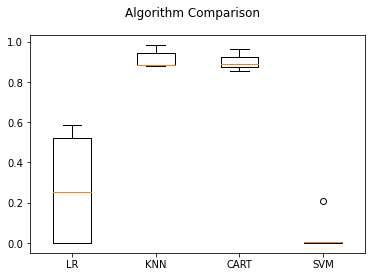

In [29]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## the models KNN and decision tree are having higher accuracies but the linear regression and svm are less accuracies.